In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
restaurantdf=pd.read_csv('yelp_dataset/ethnicity.csv',encoding = "utf-8-sig")

In [145]:
restaurantdf.shape

(56612, 122)

In [28]:
restaurantdf.head()

,business_id,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,Argentine,...,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros,foreign,racial
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,Mississauga,ON,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,Asian
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,Charlotte,NC,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,Asian
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,Phoenix,AZ,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,Hispanic
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,Mentor-on-the-Lake,OH,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,White
4,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,Las Vegas,NV,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,White


In [3]:
restaurantdf2=restaurantdf[restaurantdf['racial'].isna()==False]

In [4]:
restaurantdf3=restaurantdf[restaurantdf['racial'].isna()==True]

In [146]:
restaurantdf3.shape

(20231, 122)

# Ethnicity Classification

In [61]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [89]:
# Create arrays for the features and the response variable
y = restaurantdf2['racial'].values
X = restaurantdf2.drop(['business_id', 'name','city','state','foreign','racial'],axis=1).values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=24, stratify=y)

In [93]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

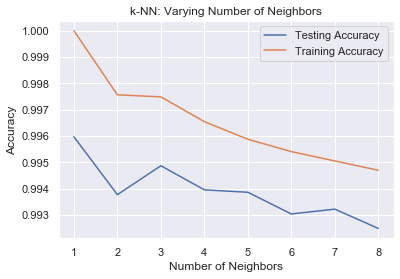

In [94]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
#Looks like all of the ones below 9 have a >99% accuracy, though highly likely to be overfitting. Using larger K to get around 98 or so accuracy.

In [159]:
knn = KNeighborsClassifier(n_neighbors=30)

In [160]:
# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [161]:
print(knn.score(X_test, y_test))

0.9877233165368758


In [162]:
#use the trained model to fill in the dataset where racial was NaN
X2 = restaurantdf3.drop(['business_id', 'name','city','state','foreign','racial'],axis=1).values
y_pred = knn.predict(X2)

In [163]:
restaurantdf3.head()

,business_id,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,Argentine,...,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros,foreign,racial
5,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,Pittsburgh,PA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Asian
7,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Asian
11,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,Toronto,ON,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Asian
13,6l00a9Gkxkcp_y-GPjYBiw,J's Fish & Chips,Newmarket,ON,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Asian
17,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,Las Vegas,NV,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Asian


In [166]:
#restaurantdf3['racial']=y_pred
restaurantdf3.loc[:,'racial']=y_pred
restaurantdf3.head()

,business_id,name,city,state,Afghan,African,American (New),American (Traditional),Arabian,Argentine,...,Oaxacan,Guamanian,Iberian,Bulgarian,Soba,Hainan,Senegalese,Churros,foreign,racial
5,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,Pittsburgh,PA,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,White
7,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,White
11,mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,Toronto,ON,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,White
13,6l00a9Gkxkcp_y-GPjYBiw,J's Fish & Chips,Newmarket,ON,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,White
17,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,Las Vegas,NV,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,White


In [167]:
restaurantdf3['racial'].value_counts()

White    20219
Black       12
Name: racial, dtype: int64

# Regression

In [5]:
from scipy import stats
x=citiesdf.restaurants
y=citiesdf.percentageForeign
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

NameError: name 'citiesdf' is not defined

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)